## IRIS FLOWER CLASSIFICATION

### Importing necessary libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings("ignore")

In [16]:
iris = pd.read_csv('Iris.csv', index_col=[0])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preparation

In [17]:
iris.shape

(150, 5)

In [18]:
iris.dropna().head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
print("Number of complete observations: ",len(iris.dropna() ))

Number of complete observations:  150


In [20]:
iris['Species'] = iris['Species'].str.lower()
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,iris-setosa
2,4.9,3.0,1.4,0.2,iris-setosa
3,4.7,3.2,1.3,0.2,iris-setosa
4,4.6,3.1,1.5,0.2,iris-setosa
5,5.0,3.6,1.4,0.2,iris-setosa


In [21]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory data analysis

### Data Visualization

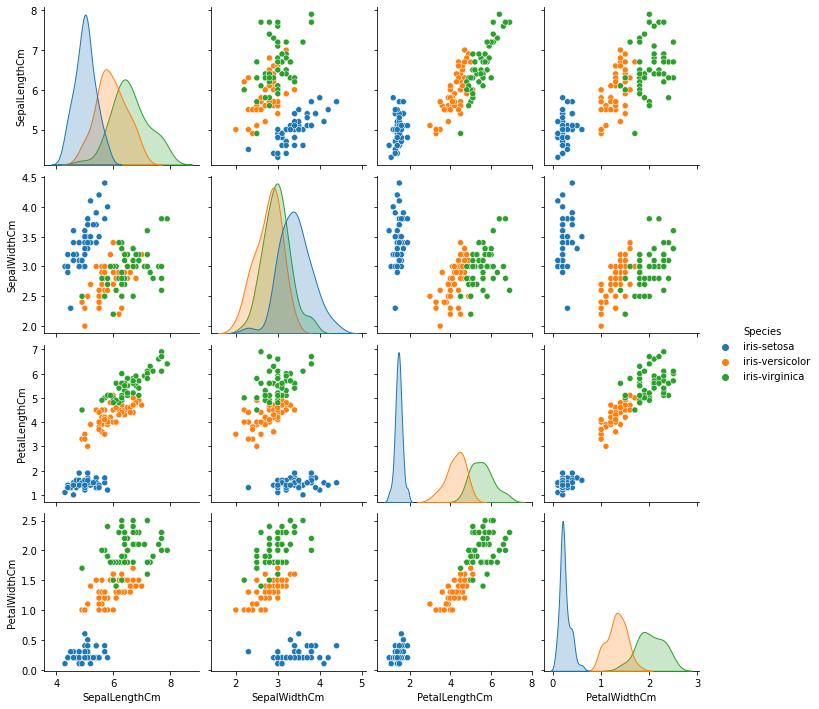

In [23]:
# Pairplot to visualize relationships between features
sns.pairplot(iris, hue='Species')
plt.show()

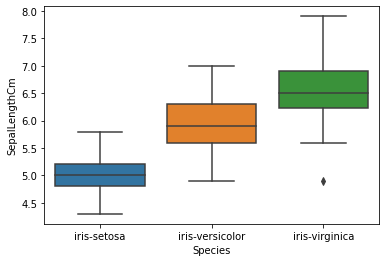

In [24]:
# Boxplot to show the distribution of each feature for each species
sns.boxplot(x='Species', y='SepalLengthCm', data=iris)
plt.show()

### Data Distribution

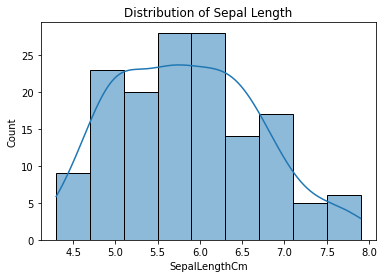

In [25]:
sns.histplot(iris['SepalLengthCm'], kde=True)
plt.title("Distribution of Sepal Length")
plt.show()

### Correlation Analysis

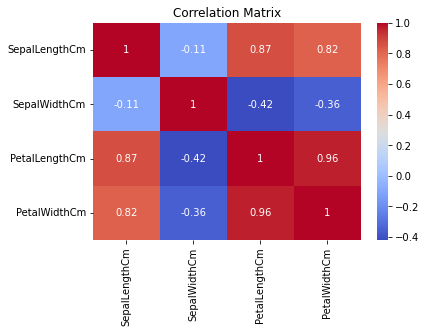

In [26]:
# Correlation matrix
correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Class Distribution 

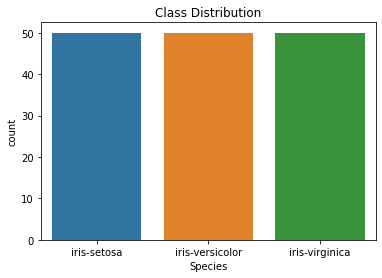

In [27]:
# Countplot to show the distribution of species
sns.countplot(x='Species', data=df)
plt.title("Class Distribution")
plt.show()

## Training the model

In [32]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred=model.predict(X_test)
y_pred

array(['iris-virginica', 'iris-versicolor', 'iris-setosa',
       'iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-setosa',
       'iris-setosa', 'iris-virginica', 'iris-setosa', 'iris-versicolor',
       'iris-virginica', 'iris-versicolor', 'iris-versicolor',
       'iris-versicolor', 'iris-virginica', 'iris-versicolor',
       'iris-versicolor', 'iris-versicolor', 'iris-setosa', 'iris-setosa',
       'iris-versicolor', 'iris-versicolor', 'iris-virginica',
       'iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-virginica',
       'iris-setosa', 'iris-versicolor'], dtype=object)

In [39]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred) 
print("Confusion Matrix: \n",cm )

Confusion Matrix: 
 [[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]


In [40]:
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print("\nSpecificity: ", specificity)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print("\nSensitivity: ", sensitivity)


Specificity:  1.0

Sensitivity:  1.0


In [41]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 100.00
